In [367]:
import requests
import time
import tqdm
import pandas as pd
import os
import json
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import re
import time
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
import seaborn as sns

plt.style.use('ggplot')

fp_data = Path.cwd() / "data"  
# Use the Path object to actually create the subfolder
Path.mkdir(fp_data, exist_ok=True) 

In [368]:
file_path = fp_data / 'log.csv'
data = pd.read_csv(file_path)

In [369]:
data.rename(columns={'timestamp;status_code;length;output_file': 'code'}, inplace=True)
data

data['time']=data['code'].str.split(';')
data['length']=data['code'].str.split(';')
data['code']=data['code'].str.split(';')

In [370]:
def get_first_element(lst):
    if len(lst) > 0:
        return lst[0]
    else:
        return None  
    
def get_second_element(lst):
    if len(lst) > 0:
        return lst[1]
    else:
        return None 
    
def get_third_element(lst):
    if len(lst) > 0:
        return lst[2]
    else:
        return None 

data['code'] = data['code'].apply(get_second_element)
data['time'] = data['time'].apply(get_first_element)
data['length'] = data['length'].apply(get_third_element).astype(float)

In [344]:
#datetime_series = pd.to_datetime(data['time'])
#data['time'] = datetime_series.dt.strftime("%H:%M:%S")


In [371]:
data['x'] = data['time'].apply(lambda x: 'Yes' if x.startswith('00' or '01') else 'No')
data1 = data[data['x'] == 'No']
data2 = data[data['x'] == 'Yes']
data1=data1.sort_values(by='time')

data = pd.concat([data1, data2], ignore_index=True)
data

,Unnamed: 0,code,time,length,x
0,7380,200,2023-08-16 11:00:34,29215.0,No
1,7381,200,2023-08-16 11:00:40,28524.0,No
2,7382,200,2023-08-16 11:00:49,669343.0,No
3,7383,200,2023-08-16 11:00:56,659664.0,No
4,7384,200,2023-08-16 11:01:02,28185.0,No
...,...,...,...,...,...
19352,15768,200,2023-08-17 16:45:07,30053.0,No
19353,15769,200,2023-08-17 16:45:13,129972.0,No
19354,15770,200,2023-08-17 16:45:20,121906.0,No
19355,15771,200,2023-08-17 16:45:27,131144.0,No


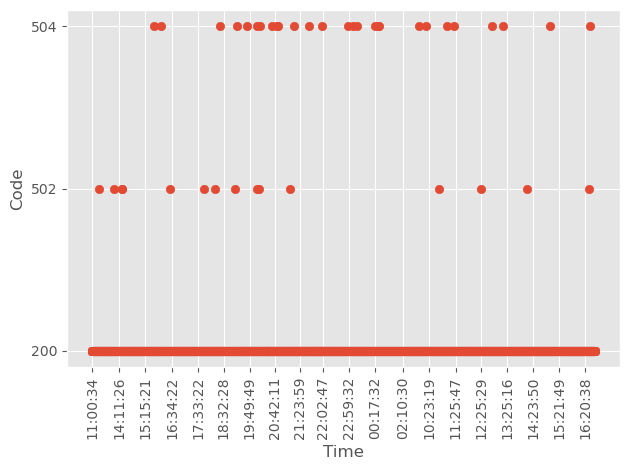

In [386]:
datetime_series = pd.to_datetime(data['time'])
data2['time'] = datetime_series.dt.strftime("%H:%M:%S")

# Create a plot
plt.scatter(data['time'], data['code'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Code')

xtick_positions = data['time']
xtick_labels = data2['time']
plt.xticks(xtick_positions, xtick_labels)

plt.xticks(xtick_positions[::1000], xtick_labels[::1000], rotation=90)

# Display the plot
plt.tight_layout()

plt.savefig(fp_data / 'error_codes.png')

plt.show()



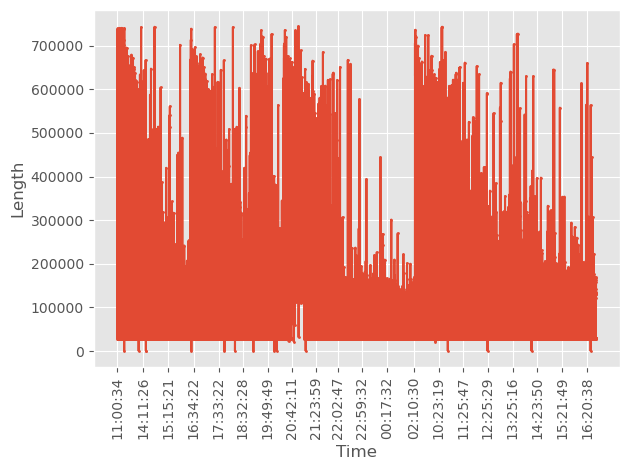

In [387]:
# Create a plot
plt.plot(data['time'], data['length'], marker='o', markersize=1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Length')

xtick_positions = data['time']
xtick_labels = data2['time']
plt.xticks(xtick_positions, xtick_labels)

plt.xticks(xtick_positions[::1000], xtick_labels[::1000], rotation=90)

# Display the plot
plt.tight_layout()
plt.savefig(fp_data / 'length_HTML.png')
plt.show()